In [1]:
#Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from tensorflow.keras import models,layers,losses
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn

In [3]:
# Load the dataset from CSV file
data=pd.read_csv('/path/data.csv')
print(data.sample(4))  # Display a random sample of 4 rows from the dataset

     Column1  Column2  Column3  Column4  Column5  Column6  Column7  Column8  \
131   0.1150   0.1163   0.0866   0.0358   0.0232   0.1267   0.2417   0.2661   
103   0.0162   0.0253   0.0262   0.0386   0.0645   0.0472   0.1056   0.1388   
112   0.0454   0.0472   0.0697   0.1021   0.1397   0.1493   0.1487   0.0771   
177   0.0201   0.0165   0.0344   0.0330   0.0397   0.0443   0.0684   0.0903   

     Column9  Column10  ...  Column52  Column53  Column54  Column55  Column56  \
131   0.4346    0.5378  ...    0.0099    0.0065    0.0085    0.0166    0.0110   
103   0.0598    0.1334  ...    0.0071    0.0082    0.0232    0.0198    0.0074   
112   0.1171    0.1675  ...    0.0120    0.0042    0.0238    0.0129    0.0084   
177   0.1739    0.2571  ...    0.0054    0.0057    0.0137    0.0109    0.0035   

     Column57  Column58  Column59  Column60  Column61  
131    0.0190    0.0141    0.0068    0.0086         M  
103    0.0035    0.0100    0.0048    0.0019         M  
112    0.0218    0.0321    0.0

In [4]:
# Print the shape of the dataset
print(data.shape)

(208, 61)


In [5]:
# Print the column names in the dataset
print(data.columns)

Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6',
       'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column12',
       'Column13', 'Column14', 'Column15', 'Column16', 'Column17', 'Column18',
       'Column19', 'Column20', 'Column21', 'Column22', 'Column23', 'Column24',
       'Column25', 'Column26', 'Column27', 'Column28', 'Column29', 'Column30',
       'Column31', 'Column32', 'Column33', 'Column34', 'Column35', 'Column36',
       'Column37', 'Column38', 'Column39', 'Column40', 'Column41', 'Column42',
       'Column43', 'Column44', 'Column45', 'Column46', 'Column47', 'Column48',
       'Column49', 'Column50', 'Column51', 'Column52', 'Column53', 'Column54',
       'Column55', 'Column56', 'Column57', 'Column58', 'Column59', 'Column60',
       'Column61'],
      dtype='object')


In [6]:
# Display the distribution of target variable 'Column61'
print(data['Column61'].value_counts())

Column61
M    111
R     97
Name: count, dtype: int64


In [7]:
# Prepare features (X) and target (Y) for modeling
X=data.drop('Column61',axis=1) # Drop target column from features
Y=data['Column61']  # Target variable
print(X.shape) # Print shape of features
print(Y.shape) # Print shape of target

(208, 60)
(208,)


In [8]:
# Convert categorical target variable to dummy/indicator variables
Y = pd.get_dummies(Y, drop_first=True, dtype=np.float32)  # R:1 M:0
print(Y.head())  # Display the first few rows of the target variable

     R
0  1.0
1  1.0
2  1.0
3  1.0
4  1.0


In [ ]:
# Check the value counts of the target variable
print(Y.value_counts())

,count
R,
0.0,111
1.0,97


In [9]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=5)
print(X_train.shape)  # Print shape of training features
print(Y_train.shape)  # Print shape of training target
print(X_test.shape)  # Print shape of testing features
print(Y_test.shape)  # Print shape of testing target

(156, 60)
(156, 1)
(52, 60)
(52, 1)


In [13]:

#creating and training model
def my_model():
  model=models.Sequential([
      layers.Dense(60,input_shape=(60,),activation='relu'),
      layers.Dense(100,activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(75,activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(50,activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(25,activation='relu'),
      layers.Dense(1,activation='sigmoid')
  ])
  model.compile(
      optimizer='adam',
      loss=losses.BinaryCrossentropy,
      metrics=['accuracy','precision','recall','f1_score']
  )
  return model

def eval(model,X,Y):
  model.evaluate(X,Y)

  #prediction
def prediction(model,X,Y):
  Y_predict=model.predict(X)
  Y_pred=[]
  for label in Y_predict:
    if label<0.5:
      Y_pred.append(0)
    else:
      Y_pred.append(1)
  print('predicted the five first labels:',Y_pred[:5])
  print('True label of first five elements:',Y[:5])
  return Y_pred


  #show classification report
def report(truth,predictions):
  print(classification_report(truth,predictions))
  #show confusion matrix
  cm=tf.math.confusion_matrix(labels=truth,predictions=predictions)
  plt.figure(figsize=(10,7))
  sn.heatmap(cm,annot=True,fmt='d')
  plt.xlabel('predicted')
  plt.ylabel('Truth')

def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

def plot_accuracy(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid()
    plt.show()




In [16]:
# Create and train the model
model=my_model() # Instantiate the model
history=model.fit(X_train,Y_train,epochs=100,validation_split=0.2,batch_size=8) # Instantiate the model

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.5352 - f1_score: 0.6585 - loss: 0.7007 - precision: 0.5300 - recall: 0.5655 - val_accuracy: 0.4375 - val_f1_score: 0.5116 - val_loss: 0.6987 - val_precision: 0.2667 - val_recall: 0.3636
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5247 - f1_score: 0.7157 - loss: 0.6923 - precision: 0.5774 - recall: 0.4742 - val_accuracy: 0.3438 - val_f1_score: 0.5116 - val_loss: 0.6952 - val_precision: 0.2917 - val_recall: 0.6364
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5413 - f1_score: 0.7048 - loss: 0.7024 - precision: 0.5876 - recall: 0.5304 - val_accuracy: 0.5000 - val_f1_score: 0.5116 - val_loss: 0.6924 - val_precision: 0.3529 - val_recall: 0.5455
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5087 - f1_score: 0.6805 - loss: 0.6882 - precision: 0.5267 - recall: 0.6164 - val_accuracy: 0.3750 - val_f1_score: 0.5116 - val_loss: 0.6969 - val_precision: 0.3333 - val_recall: 0.8182
Epoch 5

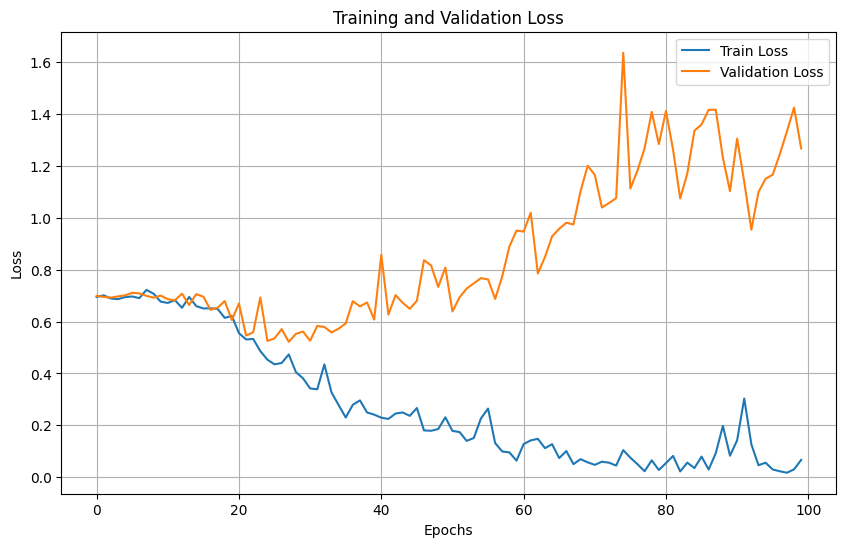

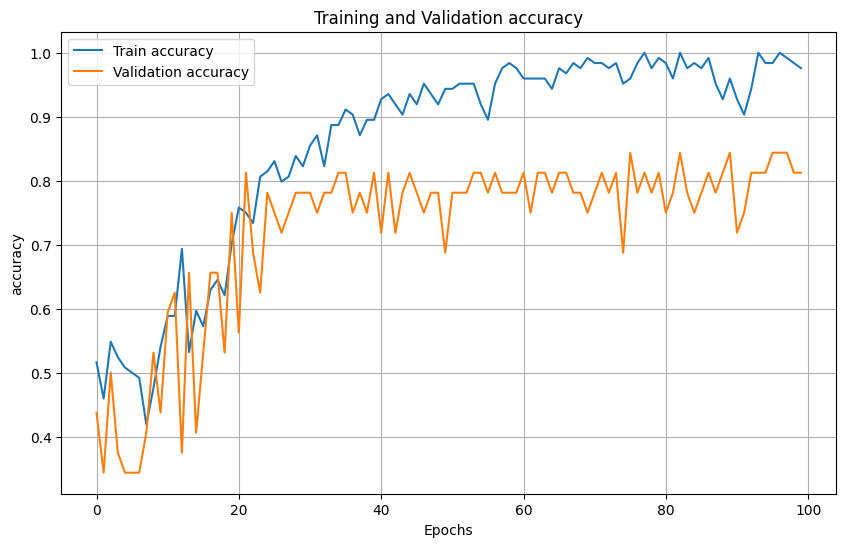

In [17]:
# Plot training and validation loss and accuracy
plot_loss(history)
plot_accuracy(history)

In [18]:
# Evaluate the model on the test set
eval(model,X_test,Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8069 - f1_score: 0.5291 - loss: 0.9517 - precision: 0.7062 - recall: 0.8000 


In [19]:
# Make predictions
preds=prediction(model,X_test,Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
predicted the five first labels: [0, 1, 0, 1, 1]
True label of first five elements:        R
156  0.0
21   1.0
193  0.0
159  0.0
34   1.0


              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82        32
         1.0       0.70      0.80      0.74        20

    accuracy                           0.79        52
   macro avg       0.78      0.79      0.78        52
weighted avg       0.80      0.79      0.79        52



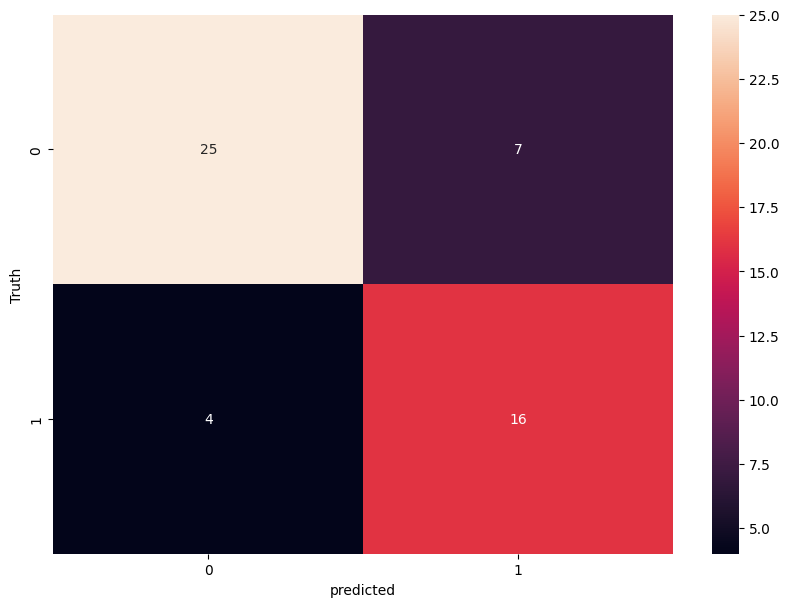

In [20]:
#Generate a report
report(Y_test,preds)